In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os

In [23]:
csv_path = './result/v2.1.csv'
file_csv = pd.read_csv(csv_path)
labels_name = ['CP','NCP','Normal']
title = '3D MC ResNet-18'
version = os.path.basename(os.path.splitext(csv_path)[0])

# Confusion  Matrix

In [24]:
from sklearn.metrics import confusion_matrix
true_ = np.asarray(file_csv['true'].values.tolist())
pred_ = np.asarray(file_csv['pred'].values.tolist())
cm = confusion_matrix(pred_,true_)

print(cm)

[[162   6   7]
 [  3 155   1]
 [ 12   8 118]]


In [25]:
def plot_confusion_matrix(cm, labels_name,title,save_path):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)   
    plt.title(title,fontsize='xx-large')    
    
    indices = np.array(range(len(labels_name)))    
    plt.xticks(indices, labels_name, fontsize='xx-large')    
    plt.yticks(indices, labels_name, fontsize='xx-large')                
    plt.ylabel('True label',fontsize='xx-large')    
    plt.xlabel('Predicted label',fontsize='xx-large')
    for first_index in range(len(cm)):    
        for second_index in range(len(cm[first_index])):    
            percent =  cm[first_index][second_index]*100
            color = 'black'if percent < 50 else 'w'
            plt.text(first_index, second_index, '%.2f%%'%(cm[first_index][second_index]*100),color=color,
                    verticalalignment='center',horizontalalignment='center',fontsize='xx-large')
    plt.colorbar()
    plt.savefig('{}/{}.png'.format(save_path,title.replace(' ','_')), format='png',bbox_inches='tight')
    
    plt.show()

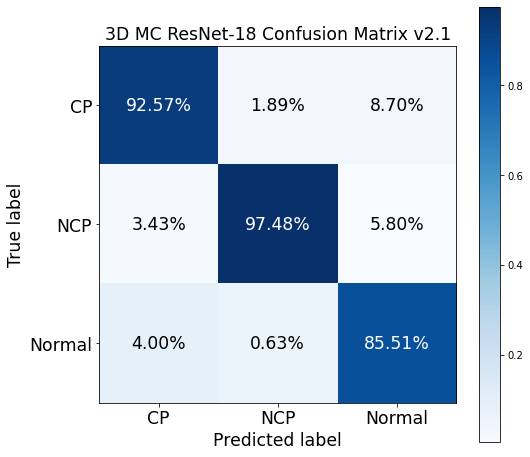

In [26]:
save_path = './result/img_png'
plot_confusion_matrix(cm,labels_name,'{} Confusion Matrix {}'.format(title,version),save_path)

# ROC Curves and AUC

In [27]:
from sklearn.metrics import roc_curve,auc
true_ = np.asarray(file_csv['true'].values.tolist())

prob_ = file_csv['prob'].values
prob_ = np.stack([eval(case) for case in prob_],axis=0)
print(prob_[:,0].shape)

(472,)


In [28]:
def plot_roc_curve(true,prob,labels_name,title,save_path):  
    color_list = ['']
    plt.figure(figsize=(8,8))
    lw = 3
    plt.figure(figsize=(10,10))
    for index in range(len(labels_name)):
        fpr,tpr,threshold = roc_curve(y_true=true,y_score=prob[:,index],pos_label=index) 
        roc_auc = auc(fpr,tpr) 
        plt.plot(fpr, tpr, 
                 lw=lw, label='%s(AUC = %0.3f)' % (labels_name[index],roc_auc)) 
        plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1 - Specificity',fontsize='xx-large')
    plt.ylabel('Sensitivity',fontsize='xx-large')
    plt.tick_params(labelsize=17)
    plt.title(title,fontsize='xx-large')
    plt.legend(loc="lower right",fontsize='xx-large')
    plt.savefig('{}/{}.png'.format(save_path,title.replace(' ','_')), format='png',bbox_inches='tight')
    plt.show()


<Figure size 576x576 with 0 Axes>

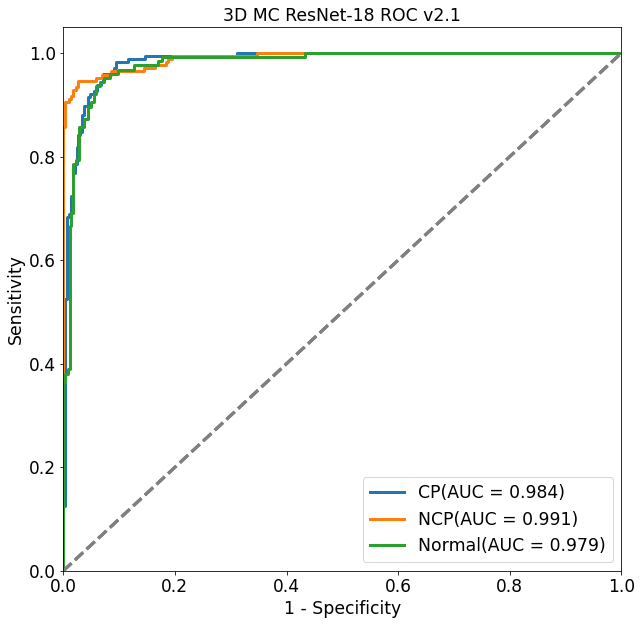

In [29]:
save_path = './result/img_png'
plot_roc_curve(true_,prob_,labels_name,'{} ROC {}'.format(title,version),save_path)

# Classification Report

In [30]:
from sklearn.metrics import classification_report

true_ = np.asarray(file_csv['true'].values.tolist())
pred_ = np.asarray(file_csv['pred'].values.tolist())
print(classification_report(true_, pred_, target_names=labels_name,output_dict=True))

{'CP': {'precision': 0.9257142857142857, 'recall': 0.9152542372881356, 'f1-score': 0.9204545454545455, 'support': 177}, 'NCP': {'precision': 0.9748427672955975, 'recall': 0.9171597633136095, 'f1-score': 0.9451219512195121, 'support': 169}, 'Normal': {'precision': 0.855072463768116, 'recall': 0.9365079365079365, 'f1-score': 0.8939393939393939, 'support': 126}, 'accuracy': 0.9216101694915254, 'macro avg': {'precision': 0.918543172259333, 'recall': 0.9229739790365605, 'f1-score': 0.919838630204484, 'support': 472}, 'weighted avg': {'precision': 0.9244470056762016, 'recall': 0.9216101694915254, 'f1-score': 0.9222085337667706, 'support': 472}}


In [31]:
print(classification_report(true_, pred_, target_names=labels_name,output_dict=False))

              precision    recall  f1-score   support

          CP       0.93      0.92      0.92       177
         NCP       0.97      0.92      0.95       169
      Normal       0.86      0.94      0.89       126

    accuracy                           0.92       472
   macro avg       0.92      0.92      0.92       472
weighted avg       0.92      0.92      0.92       472

